# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
cosine_rv = sts.cosine() # Оставил косинус
sample = cosine_rv.rvs(100)
sample

array([-0.58865189, -0.50160447, -2.31097292, -1.02672536,  0.02272526,
        0.88087532, -1.36482005,  1.57496127,  0.04815756, -0.9665331 ,
        0.6818278 ,  1.41200049,  0.16035202,  0.3761727 ,  0.41183952,
        1.92888635, -0.96470821,  2.01111169,  0.61475426, -0.69373599,
       -0.10045021, -0.95940898,  0.42783331,  0.54513549, -0.13903357,
       -0.02353721,  1.11335624, -0.74051656, -0.15644842, -0.88022253,
       -2.08498664,  0.69894176,  0.50988952, -0.46711715,  0.18168976,
        0.37620224,  1.5439107 ,  0.02210694,  0.66519002, -0.29817287,
        0.84128695,  1.38872105,  0.78288469, -0.36102817,  0.51272978,
        1.47407515,  0.20317153, -1.48628842, -1.84375553, -1.24310379,
       -1.05732871, -1.27082085,  1.10488856,  0.88679829,  0.06733186,
        1.79020628, -0.44975599,  0.42844103,  1.96572428, -2.16602225,
        1.29183513, -0.3064807 ,  0.99547976, -0.8745607 ,  0.40332392,
        1.68797026,  0.41472611, -0.06542501, -0.13990972, -0.86

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = cosine_rv.mean() # настоящее среднее случайной величины
real_mean

0.0

In [5]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины
real_var

1.2898681336964528

### Постройте гистограмму выборки и теоретическую плотность распределения

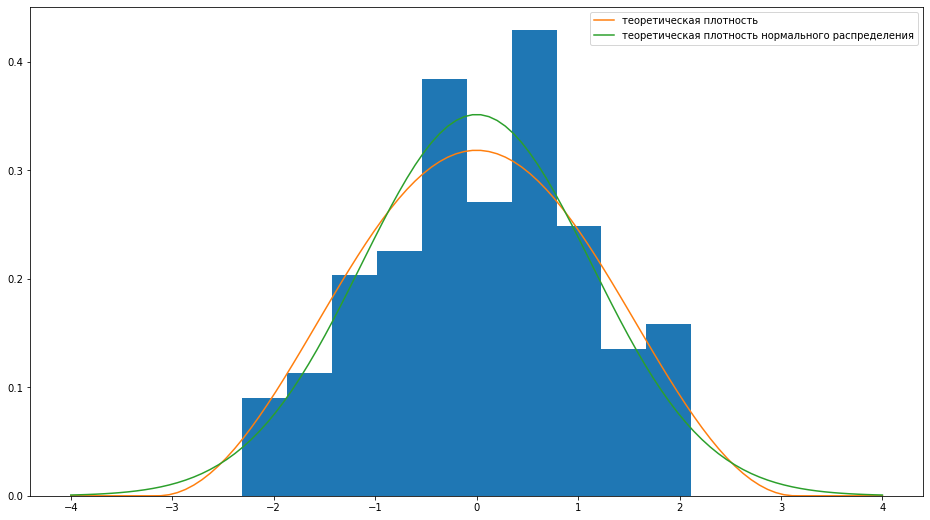

In [6]:
# ваш код тут
plt.figure(figsize=(16,9))
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=1)
norm_rv_cos = sts.norm(loc=cosine_rv.mean(), scale=cosine_rv.std())
pdf_cos = norm_rv_cos.pdf(x)
plt.plot(x, pdf_cos, label='теоретическая плотность нормального распределения', alpha=1) 
# Сравним распределение косинуса с нормальным распределением. Они очень близки.

plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.025801335037817848
1.0983017625903424


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

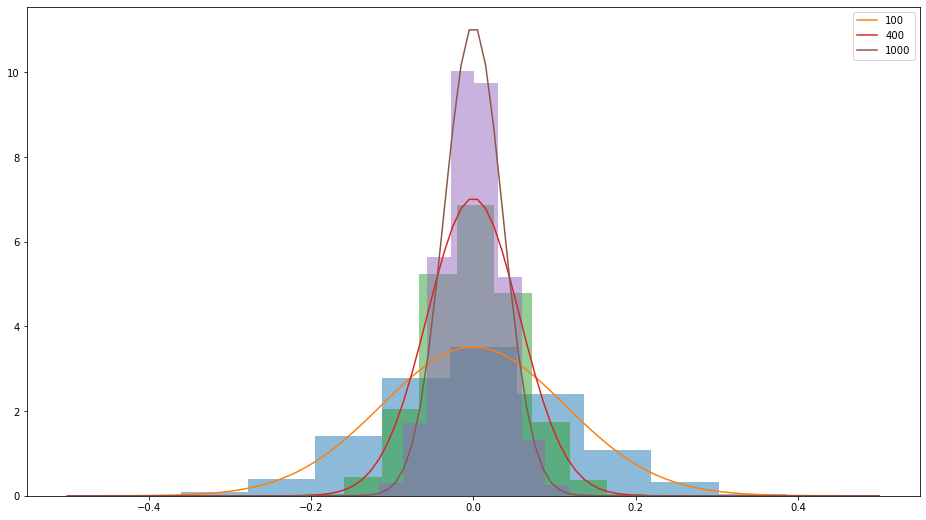

In [8]:
# ваш код тут
choice = [100,400,1000] # сделал только три объема, чтобы было лучше видно график
plt.figure(figsize=(16,9))
x = np.linspace(-0.5,0.5,100)
for N in choice:
    means = []
    for i in range(10000):
         means.append(np.mean(cosine_rv.rvs(N)))
    # Получаем объект нормального распределения. СКО берем расчетное от распределения и делим на корень из объема выборки.        
    norm_rv = sts.norm(loc=cosine_rv.mean(), scale=cosine_rv.std() / np.sqrt(N)) 
    pdf = norm_rv.pdf(x)
    plt.hist(means, alpha=0.5, density=True)
    plt.plot(x, pdf)
    
plt.legend(choice)


# pdf = cosine_rv.pdf(x)
# plt.plot(x, pdf, label='теоретическая плотность', alpha=1)

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [9]:
# Для данного распределения аппроксимация распределения выборочного среднего работает хорошо. 
# Само распределение симметрично, без перекосов и приближено к нормальному распределению.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [10]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
pd.set_option('display.max_columns', None)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [11]:
df.info() # Пропусков не обнаружено

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [12]:
tdc_churn = df['total day calls'][df['churn']==True] # Выбрали тех, кто ушел
len(tdc_churn) #483 entries

483

In [13]:
tdc_nonchurn = df['total day calls'][df['churn']==False] # Выбрали тех, кто не ушел
len(tdc_nonchurn)

2850

(array([0.00012548, 0.        , 0.00087835, 0.00213313, 0.00740322,
        0.01480645, 0.01932367, 0.01179497, 0.00363887, 0.00050191]),
 array([  0. ,  16.5,  33. ,  49.5,  66. ,  82.5,  99. , 115.5, 132. ,
        148.5, 165. ]),
 <BarContainer object of 10 artists>)

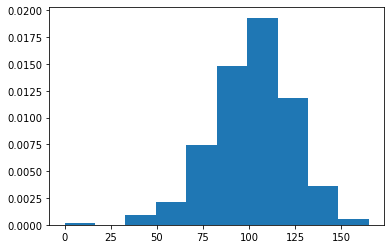

In [14]:
plt.hist(tdc_churn, density=True)

#выглядит как нормальное распределение 
# x = np.linspace(0,180,400)
# norm_rv = sts.norm(np.mean(tdc_churn), np.std(tdc_churn)) 
# pdf = norm_rv.pdf(x)
# plt.plot(x, pdf)

## Сначала рассмотрим churn = True
### Т.к. распределение похоже на нормальное, то определим сначала доверительный интервал на выборки.
А если быть точнее, то по сути данная выборка и есть выборка средних значений кол-ва телефонных звонков, при этом абоненты друг от друга скорее всего не зависят. То есть можем считать, что распределение нормальное.

In [15]:
# Попробуем определить доверительный интервал на основе такой выборки. alpha = 0,05
from statsmodels.stats.weightstats import _zconfint_generic
data = tdc_churn
N = len(data)

print("Доверительный интервал для среднего по выборке, с рассчитанной по выборке дисперсией: ({}, {}) ".format(
    np.mean(data) - 1.96 * np.std(data, ddof=1)/ np.sqrt(N-1), np.mean(data) + 1.96 * np.std(data, ddof=1) / np.sqrt(N-1) 
))
print("Доверительный интервал для среднего по выборке, интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N-1)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по выборке методом _zconfint_generic: {} ".format(
    _zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
)) # alternative что за альтернативная гипотеза???

print(f"Среднее выборки: {data.mean()}")

Доверительный интервал для среднего по выборке, с рассчитанной по выборке дисперсией: (99.40863130099713, 103.26217615241903) 
Доверительный интервал для среднего по выборке, интервальная оценка: (99.40866670589261, 103.26214074752355) 
Доверительный интервал для среднего по выборке методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 
Среднее выборки: 101.33540372670808


### Теперь определим доверительный интервал для churn = False

In [16]:
# Попробуем определить доверительный интервал на основе такой выборки. alpha = 0,05
from statsmodels.stats.weightstats import _zconfint_generic
data = tdc_nonchurn
N = len(data)

print("Доверительный интервал для среднего по выборке, с рассчитанной по выборке дисперсией: ({}, {}) ".format(
    np.mean(data) - 1.96 * np.std(data, ddof=1)/ np.sqrt(N-1), np.mean(data) + 1.96 * np.std(data, ddof=1) / np.sqrt(N-1) 
))
print("Доверительный интервал для среднего по выборке, интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N-1)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по выборке методом _zconfint_generic: {} ".format(
    _zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
)) # alternative что за альтернативная гипотеза???

print(f"Среднее выборки: {data.mean()}")

Доверительный интервал для среднего по выборке, с рассчитанной по выборке дисперсией: (99.55604740026511, 101.01026838920858) 
Доверительный интервал для среднего по выборке, интервальная оценка: (99.55606076109109, 101.0102550283826) 
Доверительный интервал для среднего по выборке методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 
Среднее выборки: 100.28315789473685


# Заметки

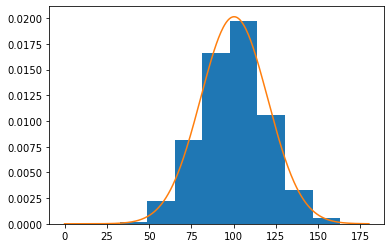

In [17]:
plt.hist(tdc_nonchurn, density=True)
x = np.linspace(0,180,400)
norm_rv = sts.norm(np.mean(tdc_nonchurn), np.std(tdc_nonchurn, ddof=1)) 
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

In [18]:
# #Сделаем выборки на основе наших данных. Только вот зачем??? У нас и так нормальное распределение получается.
# И если делать выборку по выборке, чтобы перейти к нормальному распределению, какие брать СКО? От исходного распределения? 
# Нужно ли их делить на N-1? И N-1 это от исходного распределения или от нашей выборки?
# churn_mean = []
# for i in range(10000):
#     churn_mean.append(np.random.choice(tdc_churn, 10).mean())
# data = pd.Series(churn_mean)

# print("Доверительный интервал для среднего по цпт, с расчетной дисперсией: ({}, {}) ".format(
#     np.mean(data) - 1.96 * np.std(tdc_churn, ddof=1)/ np.sqrt(N-1), np.mean(data) + 1.96 * np.std(tdc_churn, ddof=1) / np.sqrt(N-1) 
# ))

# print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
#     sts.norm.interval(alpha=0.95, loc=np.mean(data), 
#                       scale=np.std(data, ddof=1)/np.sqrt(N-1)) # alternative 'two-sided' only
# ))

# print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
#     _zconfint_generic(np.mean(churn_mean),  np.std(churn_mean, ddof=1), alpha=0.95, alternative='two-sided')
# ))

# print(f"Среднее выборки: {data.mean()}")